# Введение в регрессионный анализ

## Практикум 3. Парная линейная регрессия: построение, проверка гипотез, коэффициент детерминации R2

*Алла Тамбовцева*

### Подготовка к работе: импорт необходимых библиотек и загрузка данных

Установим библиотеку `seaborn` для более продвинутой и удобной визуализации данных:

In [ ]:
!pip install seaborn

Оператор `!` дает понять Jupyter, что выше мы написали не код на языке Python, а команду для установки, которая обычно пишется в командной строке.

*Примечание.* Если некоторые строки кода ниже, в частности, `set_theme()` не работают, это, скорее всего, из-за того, что на компьютере уже установлена более старая версия `seaborn`, в которой некоторые функции отсутствовали или выглядели иначе. Поэтому при запуске `!pip install seaborn` новая версия не была установлена. Чтобы это исправить, можно установить новую версию, написав `!pip install seaborn --upgrade`.

Импортируем эту библиотеку с сокращенным названием `sns` и заодно импортируем библиотеку `pandas` для загрузки и обработки данных:

In [1]:
import seaborn as sns
import pandas as pd

Поскольку далее у нас будут встречаться графики, давайте сразу настроим общую тему графиков – чтобы на них присутствовала сетка, а фон при этом был белым:

In [2]:
sns.set_theme(style = "whitegrid")

Настройки сохранены, они будут применены ко всем типам графиков далее. Полный список настроек можно посмотреть в [документации](https://seaborn.pydata.org/generated/seaborn.set_theme.html) функции `set_theme()`.

Теперь загрузим данные из CSV-файла `flats.csv`:

In [3]:
df = pd.read_csv("flats.csv")

Посмотрим на первые несколько строк датафрейма:

In [4]:
df.head()

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor
0,730,134,102,10.0,9.0,10,1,1,1
1,477,119,93,15.0,9.0,1,1,0,1
2,350,80,44,14.0,10.5,10,1,1,0
3,410,102,75,10.0,6.5,5,1,1,1
4,50,63,47,7.0,12.0,20,0,1,0


Напоминание – переменные в файле: 

* `price`: цена квартиры, в тысячах долларов;
* `totsp`: общая площадь, в кв.метрах;
* `livesp`: жилая площадь, в кв.метрах;
* `kitsp`: площадь кухни, в кв.метрах;
* `dist`: расстояние до центра города, в км;
* `metrdist`: расстояние до метро, в мин;
* `walk`: шаговая доступность до метро, 0 или 1;
* `brick`: дом из кирпича или аналогичного «капитального» материала, 0 или 1; • floor: удобный ли этаж (не первый и последний), 0 или 1.

### Парная регрессия: построение, проверка гипотез и R2

Приступим к изучению взаимосвязи между ценой квартиры и ее жилой площадью, а точнее, к построению регрессионной модели. Для этого нам понадобится функция `ols` из модуля внутри библиотеки `statsmodels`. Вспомним, что OLS расшифровывается как *ordinary least squares*, то есть метод наименьших квадратов (МНК) для оценки коэффициентов линейной регрессии, и импортируем эту функцию:

In [5]:
from statsmodels.formula.api import ols

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Теперь построим модель парной линейной регрессии, которая покажет, каким образом цена квартиры зависит от жилой площади:

$$
\widehat{\text{price}}_i=\hat{b}_0 +\hat{b}_1 \times \text{livesp}_i.
$$

Запишем внутри функции `ols()` формулу вида `y ~ x`, где `y` – зависимая переменная, а `x` – независимая переменная, а затем укажем название датафрейма, откуда брать эти переменные `y` и `x`:

In [6]:
ols("price ~ livesp", df)

Python создал объект «линейная модель, оцененная методом наименьших квадратов», но пока ее не оценил, то есть не вычислил коэффициенты $\hat{b}_0$ и $\hat{b}_1$. Чтобы он это сделал, нужно применить к этой модели метод `.fit()`:

In [7]:
model01 = ols("price ~ livesp", df).fit()

Ура! Модель получена, выведем подробную выдачу с результатами, применив метод `.summary()`:

In [8]:
model01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     2320.
Date:                Fri, 13 Oct 2023   Prob (F-statistic):               0.00
Time:                        02:24:46   Log-Likelihood:                -10175.
No. Observations:                2040   AIC:                         2.035e+04
Df Residuals:                    2038   BIC:                         2.036e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -94.6768      4.679    -20.233      0.000    -103.853     -85.500
livesp         4.7947      0.100     48.165      0.000       4.599       4.990
==============================================================================
Omnibus:                      927.512   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9175.101
Skew:                           1.884   Prob(JB):                         0.00
Kurtosis:                      12.682   Cond. No.                         280.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

В первой части выдачи сохранена сводная информация по модели. Из самого актуального пока здесь только число наблюдений (`No.observations`), коэффициент детерминации $R^2$ (`R-squared`) и его скорректированная версия (`Adj. R-squared`).

**Интерпретация:** так как $R^2$ у этой модели равен примерно 0.53, можем заключить, что модель объясняет 53% дисперсии зависимой переменной. То есть, если предположить между жилой площадью и ценой квартиры линейную связь, разнообразие значений цен на квартиры на 53% можно объяснить тем, что квартиры отличаются друг о друга величиной жилой площади. Такой процент объясненной дисперсии нельзя считать очень высоким, но это вполне ожидаемо: странно ожидать очень высокой объяснимой силы от модели, которая предполагает, что цена квартиры завсисит только от ее площади.

**Комментарий:** давайте заодно отметим, что такое `df residuals`. Это число степеней свободы для остатков, считается как число наблюдений минус число коэффициентов, оцениваемых в модели. Так как модель у нас парная, коэффициентов всего два ($\hat{b}_0$ и $\hat{b}_1$), значение `df` здесь $2040 - 2 = 2038$. 

Перейдем к основной части выдачи – коэффициентам. 

Начнем с уравнения модели, выпишем коэффициенты из `coef` и подставим в уравнение (`Intercept` – константа): 
    
$$
\widehat{\text{price}_i} = -94.68 + 4.79 \times \text{livesp}_i.
$$
    
    
**Интерпретация:**

* **Константа** в данном случае не интерпретируема: сложно представить себе квартиру площадью 0 квадратных метров и оценить ее стоимость. Поэтому вполне логично, что константа даже получилась отрицательной (отрицательной стоимость быть не может).

* А вот с **оценкой коэффициента при жилой площади** `livesp` все в порядке. При увеличении жилой площади квартиры на 1 квадратный метр, ее стоимость, в среднем, увеличивается на 4.79 тысячи долларов. При этом стоит понимать, что эта интерпретация, естественная и математически корректная, может немного вводить в заблуждение. Так как в реальности мы не можем экспериментально увеличивать площадь квартиры и смотреть, как это отразится на ее стоимости, эту интерпретацию стоит понимать так: если мы будем сравнивать две квартиры, которые отличаются друг от друга только жилой площадью, та квартира, которая на 1 квадратный метр больше, в среднем, будет на 4.79 тысячи долларов дороже.

Если говорить о значимости, то оценку коэффициента при `livesp` **можно считать значимо отличной от 0, то есть статистически значимой на 5%-ном уровне значимости**, по двум причинам:

* во-первых, **p-value** (`P>|t|`), вычисленное на основе наблюдаемого значения t-статистики для этого коэффициента, равно 0, что меньше 0.05, следовательно, нулевая гипотеза о незначимости оценки коэффициента отвергается;
* во-вторых, само **наблюдаемое значение t-статистики** равно 48.165, огромное, точно выходит за границы типичных значений статистики от $-2$ до $2$ (для 95%-ного уровня доверия), то есть попадает в критическую область, в зону отвержения нулевой гипотезы.

На самом деле, можно найти еще и третью причину такого вывода. Если мы посмотрим на 95%-ный доверительный интервал для оценки коэффициента (а он здесь от 4.599	до 4.990), мы заметим, что он не включает 0, что также свидетельствует о значимом (на 5%-ном уровне значимости) отличии от 0. 

Последнюю часть выдачи пока трогать не будем, ещё рано. Лучше представим выдачу выше в более компактном виде: 

In [9]:
print(model01.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     2320.
Date:                Fri, 13 Oct 2023   Prob (F-statistic):               0.00
Time:                        02:24:47   Log-Likelihood:                -10175.
No. Observations:                2040   AIC:                         2.035e+04
Df Residuals:                    2038   BIC:                         2.036e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -94.6768      4.679    -20.233      0.0

Коэффициенты модели можно запросить отдельно, извлечь их из объекта `model01` как атрибут:

In [10]:
print(model01.params)

Intercept   -94.676811
livesp        4.794703
dtype: float64


С таким же успехом можно извлечь и другие характеристики модели, например, коэффициент детерминации $R^2$:

In [11]:
print(model01.rsquared)

0.5323360083818047


Или суммы квадратов, которые используются для вычисления $R^2$:

In [12]:
print(model01.ess) # ESS: explained
print(model01.ssr) # RSS: residual 
print(model01.centered_tss) # TSS: total

2921280.071642009
2566381.9043383827
5487661.975980392


Поделим ESS на TSS и проверим, что это действительно совпадает с коэффициентом детерминации:

In [13]:
model01.ess / model01.centered_tss # совпадает!

0.5323360083818047

### Парная регрессия: визуализация и доверительные интервалы

Теперь давайте, используя `seaborn`, построим диаграмму рассеивания с добавленной на нее регрессионной прямой. 
Для этого нам понадобится специальная функция `lmplot()`: 

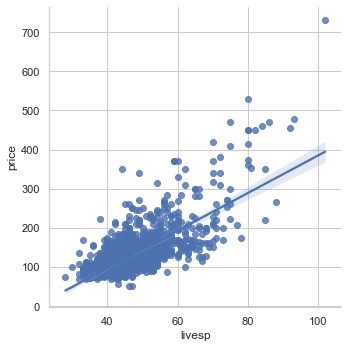

In [14]:
sns.lmplot(data = df, x = "livesp", y = "price");

Устройство этой функции простое: в `data` указываем название датафрейма, столбцы из которого мы используем для построения графика, а затем в `x` и `y` перечисляем сами названия этих столбцов.

График получился вполне наглядным, построена регрессионная прямая с добавленным 95%-ным доверительным интервалом для нее (закрашенный «коридор» вокруг прямой, который показывает, где с 95%-ной уверенностью эта прямая может лежать, если мы учтем, что регрессию можно строить и на других выборках, на которых значения оценок коэффициентов $\hat{b}_0$ и $\hat{b}_1$, определяющих вид и наклон прямой, будут другими).



Давайте подумаем, как этот «коридор» мог быть построен! Для начала вспомним, как строятся 95%-ные доверительные интервалы для оценок $\hat{b}_0$ и $\hat{b}_1$. Выведем сами оценки коэффициентов: 

In [15]:
# сохраняем их в переменные для удобства
b0, b1 = model01.params
print(b0, b1)

-94.6768106892147 4.794703091211039


Теперь их стандартные ошибки:

In [16]:
# тоже сохраняем их для удобства
se_b0, se_b1 = model01.bse
print(se_b0, se_b1)

4.679225030128096 0.09954825996867937


Наконец, построим 95%-ный доверительный интервал для $\hat{b}_0$:

In [17]:
# 95%-ный доверительный интервал для b^0
(b0 - 2 * se_b0, b0 + 2 * se_b0)

(-104.0352607494709, -85.31836062895852)

И 95%-ный доверительный интервал для $\hat{b}_1$:

In [18]:
# 95%-ный доверительный интервал для b^1
(b1 - 2 * se_b1, b1 + 2 * se_b1)

(4.59560657127368, 4.993799611148398)

Итак, что делает Python при построении «коридора» для прямой на графике? Он подставляет границы полученных интервалов в уравнение регрессии на место $\hat{b}_0$ и $\hat{b}_1$, получает самую «низкую» линию из возможных и самую «высокую» линию из возможных, формирует из них границы «коридора» и закрашивает, что внутри.